In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import random 
from random import sample
import community

In [2]:
G = nx.scale_free_graph(100, seed=21)
options = {
 'node_color': "lightblue",
 'node_size': 50,
 'width': 0.5}
#plt.figure(figsize=(8, 6), dpi=80)
nx.draw_shell(G, with_labels=False, font_weight='bold', **options)
#plt.show()

In [3]:
nx.write_graphml(G, "scaleFreeExample.graphml")

In [8]:
def draw_bipartite(B, node_size = 50, width = 0.5, with_labels = False):
    '''Draws a bipartite graph, coloring nodes accordingly. B is a networkX graph object'''
    
    top_nodes = set(n for n,d in B.nodes(data=True) if d['bipartite']==0)
    bottom_nodes = set(B) - top_nodes

    nodecolor = []
    for node in B.nodes():
        a = 'blue' if node in top_nodes else 'aqua'
        nodecolor.append(a)

    options = {
     'node_size': node_size,
     'width': width,
    'node_color': nodecolor
    }
    
    #pos = dict()
    #pos.update( (n, (1, i)) for i, n in enumerate(top_nodes) ) # put nodes from top_nodes at x=1
    #pos.update( (n, (2, i)) for i, n in enumerate(bottom_nodes) ) # put nodes from bottom_nodes at x=2

    nx.draw_spring(B, with_labels=with_labels, **options)
    plt.show()

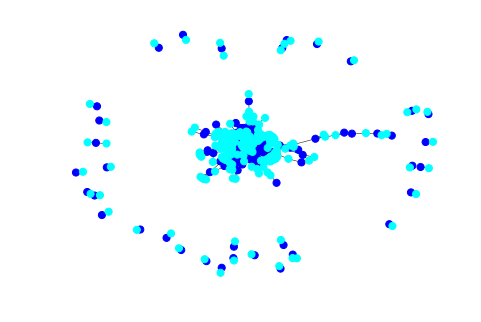

In [9]:
#make basic preferential attachment graph with a scale free degree sequence
S = nx.scale_free_graph(100)
degree_seq = [d for n, d in S.degree()]
B = bipartite.preferential_attachment_graph(degree_seq, p=0.5)
draw_bipartite(B)

In [ ]:
def scalefree_bipartite_configuration(n):
    
    '''Uses configuration model to generate a bipartite graph with scale-free degree distribution. 
    Constraint is that there must be same number of nodes in both groups'''
    
    G_bipartite = nx.scale_free_graph(n)
    G_bipartite2 = nx.scale_free_graph(n)
    degree_seq = [d for n, d in G_bipartite.degree()] 
    degree_seq_2 = [d for n, d in G_bipartite2.degree()] 
    scale_bipartite = bipartite.configuration_model(degree_seq, degree_seq_2)
    return scale_bipartite

BSF = scalefree_bipartite_configuration(20)
#nx.write_graphml(BSF, "configurationModelExample.graphml")